In [1]:
import sys
sys.path.append('../code')
from init_mooc_nb import *
init_notebook()

Populated the namespace with:
np, matplotlib, kwant, holoviews, init_notebook, interact, display_html, plt, pf, SimpleNamespace, pprint_matrix, scientific_number, pretty_fmt_complex
from code/edx_components:
MoocVideo, PreprintReference, MoocDiscussion, MoocCheckboxesAssessment, MoocMultipleChoiceAssessment, MoocPeerAssessment, MoocSelfAssessment
from code/functions:
spectrum, hamiltonian_array, h_k, pauli


Press this button to show/hide the code used in the notebook:

**No content above this line is visible in edX**

# Introduction

The topological order is introduced by Barbara Terhal from RWTH Aachen.

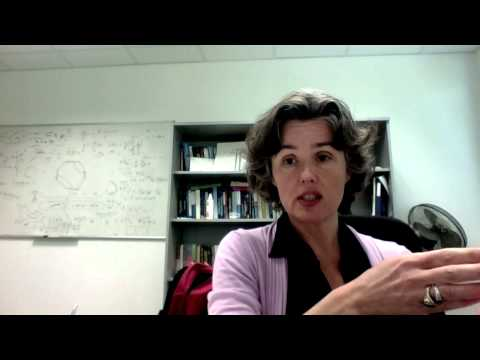

In [2]:
MoocVideo("rLdHCKxMumY", src_location="12.2-intro")

# Simplest model for topological degeneracy: Toric code

We have worked hard to create topological models so far. The FQH system, which is the most topological in some sense, was also more obscure in terms of microscopics. Here, we follow Alexei Kitaev and write down a simple Hamiltonian that is obviously topological, but also relatively easy to analyse.

Let's consider a system of localized spin$-1/2$ electrons that live on the bonds of a square lattice. The particular Hamiltonian that Kitaev wrote down is:

$$H=-A_v\sum_{+}\prod_+ \sigma_z-B_p\sum_{\Box}\prod_{\Box} \sigma_x.$$

As you can see in the figure below, $\Box$ refers to the spins on the bonds that surround a plaquette and $+$ refers to the bonds that surround a vertex. The beauty of this Hamiltonian is that all the terms commute between themselves. The only terms that you might suspect not to commute are a plaquette term and a vertex term that share some bonds. But you can convince yourself easily (by  looking at the figure) that such terms always share an even number of spins. This means that the commutation picks up an even number of minus signs and so these terms commute as well.

![](figures/toric_layout.svg)

Since $H$ is a sum of commuting terms, we can calculate the ground state as the simultaneous ground state for all the terms. 
Let us first look at the vertex terms proportional to $A$. If we draw a red line through bond connecting neighboring spins with $\sigma_z=-1$ on our lattice (as shown below), then we find that each vertex in the ground state configuration has an even number of red lines coming in. Thus, we can think of the red  lines forming loops that can never be open ended. This allows us to view the ground state of the toric code as a loop gas. 

![](figures/loops.svg)

What if we focus on the large plaquette term limit i.e. $A_v\ll B_p$ instead? The toric code is fairly symmetric between the vertex and plaquette terms. Clearly, focusing on the $\sigma_z$ diagonal basis was a choice. If we draw loops (blue lines) through the dual lattice (whose vertices are in the middle of the original lattice) whenever $\sigma_x=-1$ on some link. This results in a loop gas picture (blue lines) on the dual lattice, which focusses on the $\sigma_x$ terms. 

Returning to the $\sigma_z$ representation, it looks like every loop configuration is a ground state wave-function and so is a massively degenerate loop space $L$. But this conclusion doesn't include the plaquette terms (i.e. the $B_p$ coefficient) yet. Since the plaquette terms commute with the vertex terms in the Hamiltonian, the plaquette terms take us between different loop configurations. Considering the plaquette Hamiltonian in the low energy space of closed loops we can show that the ground state wave-function must be the sum of all possible (i.e. ones that can be reached by applying the plaquette terms) loop configurations with equal weight. 

The ground state looks pretty non-degenerate at this point but if we consider the system with periodic boundary conditions - namely on a torus, we immediately see that there are 4 topologically distinct loop configurations that are degenerate. Basically, the plaquette terms can only deform the loops smoothly and therefore cannot change the parity of the winding numbers of the loops. 

It is however possible to continuously deform a closed loop into a pair of loops along some cycle of the torus. So only the parity of the loop winding across a cut cannot be changed. Thus, the toric code on a torus has 4 degenerate ground state wave-functions (all with the same energy), which are topologically distinct. The difference between these wave functions is the parity of the number of loops crossing a vertical or a horizontal cycle on the torus.

Does this have anything to do with the way we have defined topology in this course, using the bulk-edge correspondence? Unfortunately and confusingly, not. These interacting systems are topological in the sense of having a topological degeneracy between topologically distinct states that cannot be continuously deformed into one another. In a sense, this is a more amazing feature than the bulk edge correspondence itself - the degeneracy between these states cannot be lifted by any reasonable (local) perturbation. This is sort of similar to Majorana fermions, but even more robust. In fact, the toric code does not even have edge states, so there is really no bulk-edge correspondence to speak of.

The topological robustness makes the topologically degenerate states particularly attractive to store quantum information. The main challenge of quantum information is the quantum decoherence problem, where local fluctuations in the Hamiltonian destroy the phase coherence of the quantum system used to store information. The solution proposed by topological quantum computation is to use the topologically degenerate space of a toric code to store the information. In fact, this is in essence what is being attempted by experimentalists who work on superconducting qubits, under the framework of the surface code. 

In [3]:
question = ("How would the topological degeneracy of the ground state that comes from the loop configurations "
            "change if we put it on a torus (donut) with two holes?")

answers = ["Since there is still an infinite number of loop configurations, the degeneracy would be infinite.",
           "Since there is one additional hole there are two more distinct cycles. "
           "So  the number of ground states increases by a factor of 4.",
           "It still remains 4 since the loops is topologically forbidden from going around the extra loops.",
           "Since there is one additional hole the loops can go around this hole an even or an odd number of time, "
           "so the degeneracy increases from 4 to 8."]

explanation = ("The additional hole introduces the possibility of 2 values of parity on each extra cycle. This adds a "
               "factor of $2 \\times 2=4$.")

MoocMultipleChoiceAssessment(question=question, answers=answers, correct_answer=1, explanation=explanation)

MoocMultipleChoiceAssessment(**{'correct_answer': 1, 'question': 'How would the topological degeneracy of the ground state that comes from the loop configurations change if we put it on a torus (donut) with two holes?', 'explanation': 'The additional hole introduces the possibility of 2 values of parity on each extra cycle. This adds a factor of $2 \\times 2=4$.', 'display_name': 'Question', 'answers': ['Since there is still an infinite number of loop configurations, the degeneracy would be infinite.', 'Since there is one additional hole there are two more distinct cycles. So  the number of ground states increases by a factor of 4.', 'It still remains 4 since the loops is topologically forbidden from going around the extra loops.', 'Since there is one additional hole the loops can go around this hole an even or an odd number of time, so the degeneracy increases from 4 to 8.'], 'max_attempts': 2})

# Particle-like excitations

As we saw in the FQH systems, excitations with fractional charge and statistics was really the hall-mark of topologically degenerate states. Since the basic degree of freedom in the toric code are spin, we expect all excitations to be neutral. But there is a possibility that we get fractionalized statistics. The neat thing about the toric code Hamiltonian is that it allows us to not only compute the ground state for the toric code but also all the excited states. Again, this is not too surprising since all the terms in the Hamiltonian commute, so all eigenstates are simultaneous eigenstates of the vertex and plaquette terms. If we focus on the vertex terms first (let's say by assuming that $B_p\ll A_v$), we can get excitations of the vertex Hamiltonian by breaking loops. We can think of the end points of the loops as excitations, since the plaquette terms proportional to $B_p$ make the plaquette terms fluctuate. These particles (that you see in the figure below) because of analogy with $Z_2$ gauge theory, are called the electric defects, which we label 'e'. As shown below, analogous defects in $\sigma_x=-1$-loops on the dual lattice are referred to as magnetic defects, which we will label 'm'. 

![](figures/toric_exchanges.svg)

While the intuitive picture for the excitations as ends of broken loops is nice, to describe these exctiation in the more general case, where $A_v$ and $B_p$ are comparable, it is convenient to define the so-called Wilson path operators 

$$W_e=\prod_{\mathcal{l}_e} \sigma_z,\quad\, W_m=\prod_{\mathcal{l}_m}  \sigma_x.$$

By viewing the system in the $\sigma_z$-basis in the limit $B_p\rightarrow 0$, we see that the operator $W_e$ counts the parity of $\sigma_z=-1$ spins that lie on the loop $\mathcal{l}_e$. Therefore, in this limit $W_e$ measures the parity of 'e' excitations inside the loop $\mathcal{l}_e$. The  operator $W_e$ is a product of the vertex terms inside the loop $\mathcal{l}_e$ and hence commutes with $H$ for any strength  of the plaquette terms proportional to $B_p$. 

> Therefore $W_e$ and $W_m$ are conserved 'flux' operators that measure the parity of the number of electric and magnetic defects inside the loops $\mathcal{l}_{e,m}$ respectively.

Thus, the values $W_{e,m}=-1$ can also be used to define what it means to have a localized 'e' or 'm' excitation respectively. These defects describe the localized excitations of the toric code. In fact in this model, this excitation on the ground states are localized to exactly one lattice site and may be viewed as point-like particles in a vacuum.  

Just like in the quantum Hall effect, we can use the Wilson loops $W_{e,m}$ to characterize the degenerate ground states of the toric code on a torus. The value of the Wilson loop $W_e$ counts the parity of intersections of $\sigma_z=-1$ loops (red lines) crossing the Wilson loop. Therefore, the value of the Wilson loop $W_e$ along one of the cycles of the torus counts the parity of the $\sigma_z=-1$ loops crossing it. Since we can draw a pair of commuting Wilson loop $W_e$, one through each cycle of the torus, the degeneracy of the torus from $W_e=\pm 1$ is 4. This is exactly what we got from the loop picture. 

# Semionic statistics of excitations

The loop gas picture makes the 'e' and 'm' excitations, which are ends of loops look quite topological. But are they topological in a sense similar to the charges in the FQH system? To see this, let us try to interchange an 'e' particle and an 'm' particle. For starters let us see how to move each of these particles. To do this we use the 'path' operators 

$$\Gamma^{(e)}(a,b)=\prod_{a\rightarrow b}\sigma_x,\quad\,\Gamma^{(m)}(a,b)=\prod_{a\rightarrow b}\sigma_z,$$

to move an excitation from point $a$ to $b$. This is because this operator will flip $W_{e,m}(a):-1\rightarrow +1$ at end $a$ and hence destroy the excitation and also flip $W_{e,m}(b):+1\rightarrow -1$ to create an excitation. 

Now, if we try to take an 'e' particle around an 'm' particle, the path forms a loop $W_e$ around 'm'. This adds a factor of  $W_e=-1$ to the wave-function, for the double exchange process between 'e' and 'm', which is topologically equivalent to taking one particle around the other. This strange exchange statistics, which is not quite the same as the exchange of identical particles that we are used to is referred to as "semionic" statistics.

Next, we try to exchange a pair of 'e' particles. We can do this by applying a pair of path operators $\Gamma^{(e)}$ to the particles 
that form a loop. This pair of operators form loop operator $W_e$, which must be $W_e=+1$ unless there is an 'm' particle inside. Therefore the 'e' particles are bosons and so are the 'm' particles by a similar argument.

Finally, if we exchange an 'e'-'m' pair with another 'e'-'m' pair, we see, that the result is equivalent to a double exchange between an 'e' particle and an 'm' particle in addition some 'e' and 'm' exchanges. The double exchange produces a $-$ sign as we saw. However, unlike the case of exchanging 'e' and 'm' particles, the 'e'-'m' pairs (also called dyons) are identical particles and therefore we can treat them analogous to exchanging quantum particles in nature. In this context, the $-$ sign should suggest to you that the dyon 'e'-'m' are really fermions. This is rather strange because the microscopic constituents of our theory were spins whose exchange phases are always $1$ (i.e. bosons) and we end up with fermions, which are in some sense half of bosons.
Thus, the toric code, in a sense, gives us a microscopic model of "fractional statistics".

Questions about what you just learned? Ask them below!

In [4]:
MoocDiscussion("Questions", "Topological order")

MoocDiscussion(**{'discussion_id': '5be1f849b30563111778c7c260509e80', 'discussion_target': 'Topological order', 'display_name': 'Topological order', 'discussion_category': 'Questions'})